# Exercício Regressão Logísticica e Árvore de Decisão

Considere o dataset a seguir. O conjunto de dados contém informações sobre pacientes. O dataset informa se eles estão recebendo bons cuidados de saúde ou não (`PoorCare`).

Ou seja, `PoorCare` é a variável a ser classificada. Precisamos descobrir a partir dos dados apresentados no dataset, se ou não, novos pacientes vão ter um bom tratamento.

In [256]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [212]:
#https://raw.githubusercontent.com/geoninja/Analytics/master/data/quality.csv
df = pd.read_csv('https://bit.ly/2WGzsWU')

In [213]:
df.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


## Informações do dataset

* MemberID numbers the patients from 1 to 131, and is just an identifying number.
* InpatientDays is the number of inpatient visits, or number of days the person spent in the hospital.
* ERVisits is the number of times the patient visited the emergency room.
* OfficeVisits is the number of times the patient visited any doctor's office.
* Narcotics is the number of prescriptions the patient had for narcotics.
* DaysSinceLastERVisit is the number of days between the patient's last emergency room visit and the end of the study * period (set to the length of the study period if they never visited the ER). 
* Pain is the number of visits for which the patient complained about pain.
* TotalVisits is the total number of times the patient visited any healthcare provider.
* ProviderCount is the number of providers that served the patient.
* MedicalClaims is the number of days on which the patient had a medical claim.
* ClaimLines is the total number of medical claims.
* StartedOnCombination is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE).
* AcuteDrugGapSmall is the fraction of acute drugs that were refilled quickly after the prescription ran out.
* PoorCare is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care.

## Parte 1 -  Analise dos dados

Observe os dados de forma grafica e veja a correlação entre as diferentes features do modelo. Observe quais são as melhores features do modelo. Considere o `pairplot`como um bom candidato para a tarefa 

In [214]:
print(df.corr())

                      MemberID  InpatientDays  ERVisits  OfficeVisits  \
MemberID              1.000000      -0.063620 -0.011032     -0.006273   
InpatientDays        -0.063620       1.000000  0.440087      0.175901   
ERVisits             -0.011032       0.440087  1.000000      0.308526   
OfficeVisits         -0.006273       0.175901  0.308526      1.000000   
Narcotics             0.203962      -0.093769 -0.003732      0.275759   
DaysSinceLastERVisit  0.100174      -0.290121 -0.735246     -0.128388   
Pain                  0.023700       0.304058  0.546779      0.352968   
TotalVisits          -0.032954       0.622036  0.586439      0.865387   
ProviderCount         0.012511       0.244023  0.457429      0.365469   
MedicalClaims        -0.065212       0.286378  0.355319      0.498513   
ClaimLines           -0.090459       0.386951  0.542001      0.424953   
StartedOnCombination -0.144841       0.105626  0.118766      0.164056   
AcuteDrugGapSmall     0.196651      -0.001144 -0.07

<IPython.core.display.Javascript object>


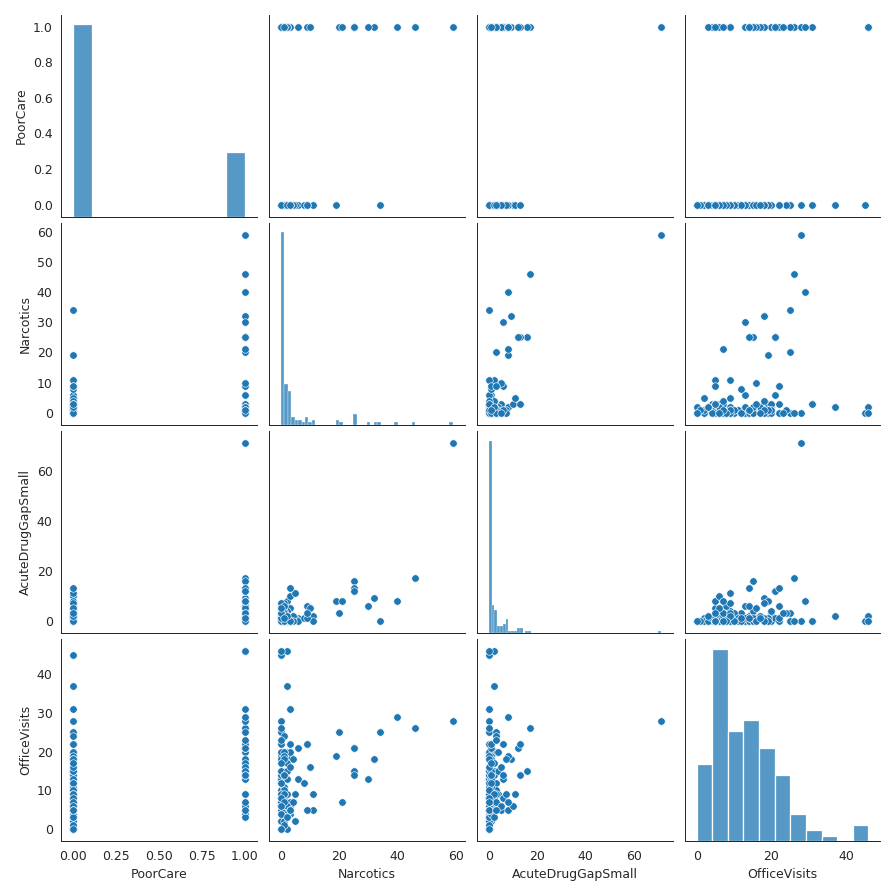

In [215]:
### Seu codigo aqui. Voce pode utilizar quantas celulas voce achar necessario.

# pairplot das variáveis com maior correlação com 'PoorCare'
sns.pairplot(df[['PoorCare', 'Narcotics', 'AcuteDrugGapSmall', 'OfficeVisits']])

## Parte 2 - Regressão logística com o `sklearn`


### Parte 2.1 - Separando os conjuntos de treinamento e teste

Separe o seu dataset com as features que você achou mais conveniente (podem ser todas as features inclusive) em um conjunto de treinamento e teste. Utilize a proporção 80%-20%


In [216]:
# Seu codigo aqui
from sklearn.model_selection import train_test_split

# Cria um dataframe apenas com as variáveis de maior correlação
dfn = df[['Narcotics', 'AcuteDrugGapSmall', 'OfficeVisits', 'PoorCare']]
dfn.head()

,Narcotics,AcuteDrugGapSmall,OfficeVisits,PoorCare
0,1,0,18,0
1,1,1,6,0
2,3,5,5,0
3,0,0,19,0
4,3,0,19,0


In [217]:
X = dfn.drop(columns = ['PoorCare'])
y = dfn['PoorCare']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### Parte 2.2 - Crie e fite o modelo sklearn apropriado. Lembre-se que 

Para esse caso precisamos prever se o paciente teve um bom tratamento ou não.
Portanto, a tarefa é de classificação para `PoorCare`. Lembre-se de utilizar o conjunto de treinamento para criação e treinamento do modelo.

In [218]:
# Seu codigo aqui
from sklearn.linear_model import LogisticRegression

In [219]:
LogReg = LogisticRegression()

In [220]:
LogReg.fit(X_train, y_train)

LogisticRegression()

### Parte 2.2 - Avaliação do modelo.

Utilize Avalie o modelo utilizando a curva `ROC` e a área embaixo da curva para avaliação do classificador.

Links úteis:
* https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5
* https://medium.com/bio-data-blog/entenda-o-que-%C3%A9-auc-e-roc-nos-modelos-de-machine-learning-8191fb4df772

In [221]:
# Seu codigo aqui.
from sklearn.metrics import plot_roc_curve

<IPython.core.display.Javascript object>


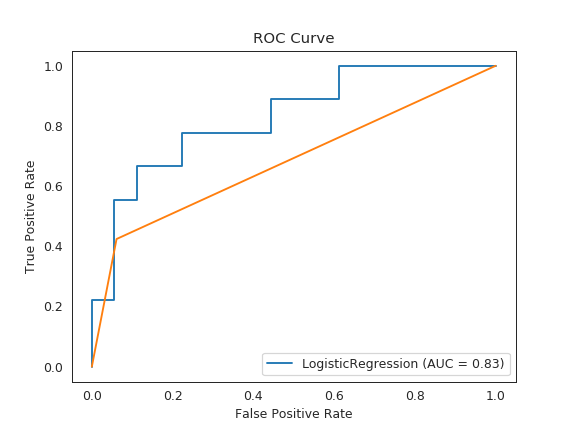

In [222]:
disp_roc = plot_roc_curve(LogReg, X_test, y_test)

## Parte 3 - Regressão logística (Modelo do zero).

Crie um modelo de regressão linear utilizando apenas funções do numpy. Ou Seja, quero que vocês criem um modelo de regressão logística a partir do zero assim como mostrado na aula. Utilize as mesmas métricas da parte 2.2 para verificar a qualidade do modelo.

In [239]:
# Seu codigo aqui
from sklearn.datasets import make_classification

In [240]:
features = X.to_numpy()
target = y.to_numpy()

In [241]:
# Função sigmoid
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [242]:
# Função custo
def compute_cost(X, y, theta):
    m = len(y)
    h = sigmoid(X @ theta)
    epsilon = 1e-5
    cost = (1/m)*(((-y).T @ np.log(h + epsilon))-((1-y).T @ np.log(1-h + epsilon)))
    return cost

In [243]:
# Implementação do gradiente descendente
def gradient_descent(X, y, params, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))

    for i in range(iterations):
        params = params - (learning_rate/m) * (X.T @ (sigmoid(X @ params) - y)) 
        cost_history[i] = compute_cost(X, y, params)

    return (cost_history, params)

In [244]:
# Arredonda para 0 ou 1, que são as respectivas classes
def predict(X, params):
    return np.round(sigmoid(X @ params))

Initial Cost is: [[0.69312718]] 

Optimal Parameters are: 
 [[-0.70689433]
 [-0.70689433]
 [-0.70689433]
 [-0.70689433]
 [ 0.06381727]
 [ 0.17951464]
 [ 0.06600607]] 



<IPython.core.display.Javascript object>


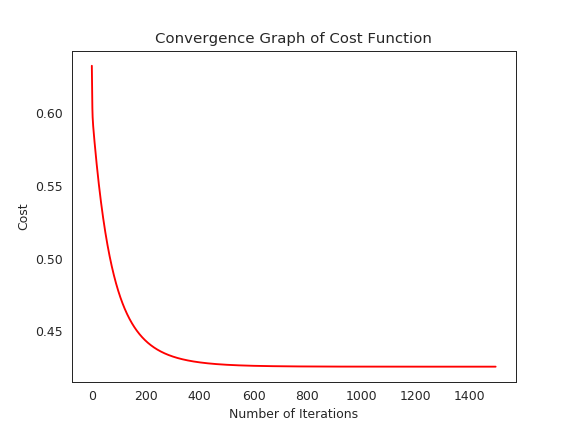

In [249]:
target = target[:,np.newaxis]
m = len(target)

features = np.hstack((np.ones((m,1)),features))
n = np.size(features, 1)
params = np.zeros((n,1))

iterations = 1500
learning_rate = 0.03

initial_cost = compute_cost(features, target, params)

print("Initial Cost is: {} \n".format(initial_cost))

(cost_history, params_optimal) = gradient_descent(features, target, params, learning_rate, iterations)

print("Optimal Parameters are: \n", params_optimal, "\n")

plt.figure()
sns.set_style('white')
plt.plot(range(len(cost_history)), cost_history, 'r')
plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

In [250]:
y_pred = predict(features, params_optimal)
score = float(sum(y_pred == target))/float(len(y))

print(score)

0.8091603053435115


In [264]:
from sklearn.metrics import roc_auc_score

In [265]:
fpr, tpr, thresholds = roc_curve(target, y_pred)

<IPython.core.display.Javascript object>


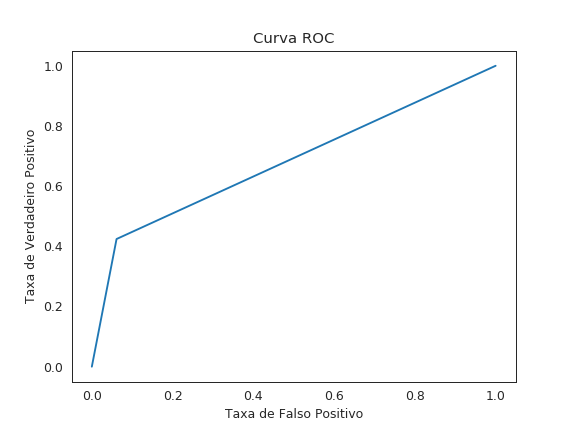

In [266]:

plt.plot(fpr, tpr)
plt.title("Curva ROC")
plt.xlabel("Taxa de Falso Positivo")
plt.ylabel("Taxa de Verdadeiro Positivo")
plt.show()

# BOM TRABALHO